## Example 1. Create a random list of weekdays (as strings)
Add random traffic counts corresponding to those days. Create dataframe then aggregate by weekday. 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
%matplotlib inline

In [125]:
D=np.random.randint(0,7,size=100); D[:10]

array([5, 1, 4, 0, 3, 5, 1, 1, 3, 3])

In [126]:
wd={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Satuday'}

In [127]:
wd[6]='Sunday'

In [128]:
wd[0]

'Monday'

In [130]:
wd.get(6)

'Sunday'

In [129]:
wd.get(7,'unknown')

'unknown'

In [131]:
wd.values()

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Satuday', 'Sunday']

In [132]:
wd.keys()

[0, 1, 2, 3, 4, 5, 6]

In [133]:
[wd[d] for d in D][:10]

['Satuday',
 'Tuesday',
 'Friday',
 'Monday',
 'Thursday',
 'Satuday',
 'Tuesday',
 'Tuesday',
 'Thursday',
 'Thursday']

In [134]:
T=np.random.randint(0,1000,size=100);

In [136]:
TrafficData=pd.DataFrame({'Day':D,'Traffic':T}); TrafficData.head()

,Day,Traffic
0,5,438
1,1,818
2,4,484
3,0,352
4,3,790


In [138]:
TrafficData.Day.map(wd).head()

0     Satuday
1     Tuesday
2      Friday
3      Monday
4    Thursday
Name: Day, dtype: object

In [139]:
TrafficData['Day']=TrafficData.Day.map(wd)

In [140]:
TrafficData.head()

,Day,Traffic
0,Satuday,438
1,Tuesday,818
2,Friday,484
3,Monday,352
4,Thursday,790


In [141]:
#accessing values
TrafficData.Traffic[1]

818

In [143]:
TrafficData.loc[1,'Traffic']

818

In [144]:
TrafficData.iloc[1,1]

818

In [ ]:
#count total traffic

In [145]:
TrafficData.Traffic.sum()

42785

In [146]:
TrafficData.Traffic.mean()

427.85

In [148]:
#traffic on Mondays
TrafficData.loc[TrafficData.Day=='Monday']

,Day,Traffic
3,Monday,352
24,Monday,319
28,Monday,196
29,Monday,899
34,Monday,40
39,Monday,452
43,Monday,395
46,Monday,456
49,Monday,319
75,Monday,66


In [149]:
TrafficData.loc[TrafficData.Day=='Monday'].Traffic.sum()

3830

In [150]:
TrafficData.groupby('Day').sum()

,Traffic
Day,
Friday,5080
Monday,3830
Satuday,6507
Sunday,5377
Thursday,8457
Tuesday,8002
Wednesday,5532


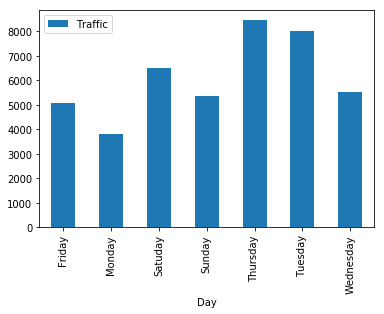

In [151]:
TrafficData.groupby('Day').sum().plot.bar()

## Task 1. Calculate and visualize the average traffic per weekday 
counting only the dayswith more than 300 traffic count

## Example 2. 
Parse the text in the file sample.txt and count the number of instances each word appears.

In [154]:
#read the text from file
with open('sample.txt', 'r') as file:
    text = file.read().replace('\n', '')

In [155]:
text

'This is a sample text for text processing in Python. We will use this text to extract a dictionary of words, identifying unique works from the text and counting the number of times they appear in the text. This will serve as an illustration of string operations, lists, for loops and dictionaries.Hope this sample text and the exercise will be helpful\r'

In [156]:
#remove ".", "," and transform all to lower case

In [157]:
text1=text.replace("."," ").replace(","," ")

In [158]:
text1

'This is a sample text for text processing in Python  We will use this text to extract a dictionary of words  identifying unique works from the text and counting the number of times they appear in the text  This will serve as an illustration of string operations  lists  for loops and dictionaries Hope this sample text and the exercise will be helpful\r'

In [159]:
text1=text1.lower()

In [160]:
words=text1.split()

In [161]:
wordCount={}
for w in words:
    wordCount[w]=wordCount.get(w,0)+1

In [31]:
import pandas as pd

In [33]:
pd.DataFrame({'word':wordCount.keys(),'count':wordCount.values()})

,count,word
0,3,and
1,1,operations
2,1,they
3,6,text
4,1,is
5,1,number
6,1,an
7,2,sample
8,1,as
9,2,in


## Task 2. Use dictionary to count traffic per weekday from D,T arrays above 

In [164]:
# Hint loop through TrafficData.index to access the rows

## Example 3

House sales in Staten Island.
1. Aggregate the dataframe to get total price, sq. ft, number of houses being sold per zip code
Get avg price per sq. foot per zip code
2. Produce a prediction for the house price based on its size and avg price per sq. foot within the same zip code. Get the top 5 underestimated/overestimated houses

In [9]:
REStaten=pd.read_csv('rollingsales_statenisland.csv')

In [10]:
REStaten.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391.0,13.0,NaN,A5,4716 AMBOY ROAD,NaN,...,1.0,0.0,1.0,"1,871",910,2002.0,1.0,A5,0,7/10/19
1,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5393.0,29.0,NaN,A1,21 FINGAL STREET,NaN,...,1.0,0.0,1.0,"9,000","3,540",1985.0,1.0,A1,"1,650,000",3/14/19
2,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5398.0,20.0,NaN,A1,1468 ARDEN AVENUE,NaN,...,1.0,0.0,1.0,"5,000","2,200",1940.0,1.0,A1,"685,000",4/15/19
3,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5399.0,15.0,NaN,A2,2 SANDBORN STREET,NaN,...,1.0,0.0,1.0,"4,845",880,1950.0,1.0,A2,0,1/24/19
4,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5403.0,8.0,NaN,A1,254 SHIRLEY AVENUE,NaN,...,1.0,0.0,1.0,"7,500","3,205",1970.0,1.0,A1,"915,000",12/21/18


In [11]:
REStaten.columns

Index([u'BOROUGH', u'NEIGHBORHOOD', u'BUILDING CLASS CATEGORY',
       u'TAX CLASS AT PRESENT', u'BLOCK', u'LOT', u'EASE-MENT',
       u'BUILDING CLASS AT PRESENT', u'ADDRESS', u'APARTMENT NUMBER',
       u'ZIP CODE', u'RESIDENTIAL UNITS', u'COMMERCIAL UNITS', u'TOTAL UNITS',
       u'LAND SQUARE FEET', u'GROSS SQUARE FEET', u'YEAR BUILT',
       u'TAX CLASS AT TIME OF SALE', u'BUILDING CLASS AT TIME OF SALE',
       u' SALE PRICE ', u'SALE DATE'],
      dtype='object')

In [14]:
REStaten.SALE_PRICE.sum()


AttributeError: 'DataFrame' object has no attribute 'SALE_PRICE'

In [15]:
REStaten.GROSS_SQUARE_FEET.sum()


AttributeError: 'DataFrame' object has no attribute 'GROSS_SQUARE_FEET'

In [16]:
REStaten.GROSS_SQUARE_FEET.mean()

1689.6509303928326

In [11]:
#average price per sq foot
1.0*REStaten.SALE_PRICE.sum()/REStaten.GROSS_SQUARE_FEET.sum()

231.93030822833916

In [18]:
REStaten['ZIP_CODE'].unique()

array([10312,     0, 10309, 10305, 10314, 10303, 10310, 10302, 10301,
       10304, 10306, 10308, 10307])

In [6]:
REStaten1=REStaten.loc[(REStaten['ZIP_CODE']>0) & (REStaten['GROSS_SQUARE_FEET']>300) & (REStaten['SALE_PRICE']>30000)].copy()

KeyError: 'ZIP_CODE'

In [63]:
REStatenZips=REStaten1.groupby(['ZIP_CODE'])[['GROSS_SQUARE_FEET','SALE_PRICE']].sum()

In [64]:
REStatenZips

,GROSS_SQUARE_FEET,SALE_PRICE
ZIP_CODE,,
10301,656793,192766761
10302,388806,91467957
10303,501691,118727605
10304,707145,222985186
10305,950800,307253779
10306,1032674,363873213
10307,503003,132096452
10308,581735,191659646
10309,1351446,306817899


In [65]:
REStaten1.groupby(['ZIP_CODE'])[['GROSS_SQUARE_FEET','SALE_PRICE','ADDRESS']].agg({'GROSS_SQUARE_FEET':'sum','SALE_PRICE':'sum','ADDRESS':'count'})

,GROSS_SQUARE_FEET,SALE_PRICE,ADDRESS
ZIP_CODE,,,
10301,656793,192766761,297
10302,388806,91467957,221
10303,501691,118727605,258
10304,707145,222985186,385
10305,950800,307253779,409
10306,1032674,363873213,678
10307,503003,132096452,199
10308,581735,191659646,320
10309,1351446,306817899,392


In [66]:
REStatenZips['AvgPriceSqFeet']=REStatenZips['SALE_PRICE']/REStatenZips['GROSS_SQUARE_FEET']

In [67]:
REStatenZips

,GROSS_SQUARE_FEET,SALE_PRICE,AvgPriceSqFeet
ZIP_CODE,,,
10301,656793,192766761,293.496979
10302,388806,91467957,235.253461
10303,501691,118727605,236.654843
10304,707145,222985186,315.331631
10305,950800,307253779,323.152902
10306,1032674,363873213,352.360196
10307,503003,132096452,262.615634
10308,581735,191659646,329.462119
10309,1351446,306817899,227.029344


In [68]:
PricePerSqFoot={z:REStatenZips.AvgPriceSqFeet[z] for z in REStatenZips.index}

In [69]:
PricePerSqFoot

{10301: 293.4969785000754,
 10302: 235.2534605947439,
 10303: 236.65484331989214,
 10304: 315.33163071223015,
 10305: 323.1529017669331,
 10306: 352.36019595729147,
 10307: 262.6156344991978,
 10308: 329.4621193498758,
 10309: 227.0293441247375,
 10310: 276.4026434306269,
 10312: 337.38479223930705,
 10314: 352.36890172025306}

In [70]:
REStaten1['ZIP_CODE'].map(PricePerSqFoot).head()

0    337.384792
1    337.384792
2    337.384792
3    337.384792
4    337.384792
Name: ZIP_CODE, dtype: float64

In [71]:
REStaten1['PRICE_ESTIMATE']=REStaten1['GROSS_SQUARE_FEET']*(REStaten1['ZIP_CODE'].map(PricePerSqFoot))

In [72]:
REStaten1['UNDERESTIMATE']=REStaten1['SALE_PRICE']/REStaten1['PRICE_ESTIMATE']

In [74]:
REStaten1.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,PRICE_ESTIMATE,UNDERESTIMATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,65,,A3,22 BLUE HERON DRIVE,,...,1,8000,3000,1987,1,A3,1185000,3/19/18,1.012154e+06,1.170770
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,19,,A1,4 EDWIN STREET,,...,1,7258,2230,1980,1,A1,866000,8/3/17,7.523681e+05,1.151032
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5406,26,,A2,87 ELMBANK STREET,,...,1,5000,912,1950,1,A2,530000,4/27/18,3.076949e+05,1.722485
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,10,,A2,112 ELMBANK STREET,,...,1,6242,1768,1975,1,A2,735000,11/7/17,5.964963e+05,1.232195
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,15,,A5,95 EAGAN AVENUE,,...,1,1546,1579,1986,1,A5,475000,9/7/17,5.327306e+05,0.891633


In [76]:
REStaten1.sort_values(by='UNDERESTIMATE').head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,PRICE_ESTIMATE,UNDERESTIMATE
7519,5,TOTTENVILLE,01 ONE FAMILY DWELLINGS,1,8017,24,,A1,66 LION STREET,,...,1,3800,2400,2001,1,A1,35000,6/27/18,6.302775e+05,0.055531
4526,5,NEW DORP,21 OFFICE BUILDINGS,4,4199,3,,O5,"35,37,39 NEW DORP PLAZA",,...,4,5073,8890,1931,4,O5,185000,12/30/17,3.132482e+06,0.059059
8117,5,WEST NEW BRIGHTON,30 WAREHOUSES,4,185,177,,E1,1689 RICHMOND TERRACE,,...,2,5500,4378,1931,4,E1,100000,11/8/17,1.210091e+06,0.082638
1841,5,ELTINGVILLE,02 TWO FAMILY DWELLINGS,1,5655,20,,B9,1036-1048 ARTHUR KILL ROAD,,...,2,5190,1780,2003,1,B9,50000,6/14/18,6.005449e+05,0.083258
8691,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,244,,B2,19 SPRUCE LANE,,...,2,3800,2700,1996,1,B2,52400,9/19/17,6.129792e+05,0.085484


In [77]:
REStaten1.sort_values(by='UNDERESTIMATE',ascending=False).head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,PRICE_ESTIMATE,UNDERESTIMATE
6994,5,SOUTH BEACH,22 STORE BUILDINGS,4,3235,68,,K1,1192 HYLAN BOULEVARD,,...,1,2240,900,1980,4,K1,2550000,8/1/17,290837.611590,8.767779
7138,5,STAPLETON,29 COMMERCIAL GARAGES,4,494,21,,G2,36 CANAL STREET,,...,1,5000,2673,1931,4,G2,5700000,9/29/17,842881.448894,6.762517
5484,5,OAKWOOD-BEACH,01 ONE FAMILY DWELLINGS,1,4678,1,,A1,402 GUYON AVENUE,,...,1,40000,2146,1920,1,A1,4100000,6/4/18,756164.980524,5.422097
8589,5,WOODROW,01 ONE FAMILY DWELLINGS,1,7094,144,,A1,718 BLOOMINGDALE ROAD,,...,1,44137,1280,1920,1,A1,1500000,2/12/18,290597.560480,5.161778
6652,5,ROSSVILLE-PORT MOBIL,29 COMMERCIAL GARAGES,4,7206,314,,G1,221 INDUSTRIAL LOOP,,...,1,16867,1600,1990,4,G1,1799862,5/2/18,363246.950600,4.954927


In [81]:
#how many times we're no more than 30% wrong?

In [83]:
1.0*sum(abs(REStaten1.UNDERESTIMATE-1)<=0.3)/len(REStaten1.UNDERESTIMATE)

0.6051096358881513

# Task 3
Aggregate sale price, size, number of houses per number of residential units, compute avg price per square feet and visualize as a bar plot (show only the bars where number of houses is >10)

### Grouping by multiple fields
Group by zip code, number of units, get price per sq.foot, then create a pivot table

In [104]:
REStaten1.loc[REStaten1['RESIDENTIAL_UNITS']<=3].groupby(['ZIP_CODE','RESIDENTIAL_UNITS'])[['GROSS_SQUARE_FEET','SALE_PRICE']].sum()

GROSS_SQUARE_FEET  SALE_PRICE
ZIP_CODE RESIDENTIAL_UNITS                               
10301    0                               6192     5975000
         1                             287503   101715804
         2                             196663    48521029
         3                              30494     6342000
10302    0                              43090     6341000
         1                             192976    52190782
         2                             144452    31866175
         3                               3920      600000
10303    0                             135224    26490067
         1                             228406    61150377
         2                             114913    26914661
         3                               2328      300000
10304    0                              31927    15596000
         1                             451634   152699126
         2                             164783    41392272
         3                              23925     5347788
10305    0                             342637    80830000
         1                             386755   149170906
         2                             197272    69677623
         3                              12724     4900250
10306    0                              19990     3528500
         1                             739016   270771196
         2                             264450    87584517
         3                               2770      492000
10307    0                              71097     3007500
         1                             255592    77506810
         2                             170464    50762142
10308    0                              49485    11594000
         1                             347779   124619257
         2                             151938    50367718
         3                               6271      578671
10309    0                             578200    64308112
         1                             445486   143983264
         2                             327760    98526523
10310    0                              47594    10200250
         1                             242885    77694106
         2                             163670    38447012
         3                               6048     1594900
10312    0                               5228     1972478
         1                             986195   332269368
         2                             410627   138523605
10314    0                              34183    16964125
         1                             773815   277108776
         2                             466499   156522509
         3                              15548     4391000

In [109]:
REStatesZipsUnits=REStaten1.loc[REStaten1['RESIDENTIAL_UNITS']<=3].groupby(['ZIP_CODE','RESIDENTIAL_UNITS'],as_index=False)[['GROSS_SQUARE_FEET','SALE_PRICE']].sum()

In [110]:
REStatesZipsUnits.head()

,ZIP_CODE,RESIDENTIAL_UNITS,GROSS_SQUARE_FEET,SALE_PRICE
0,10301,0,6192,5975000
1,10301,1,287503,101715804
2,10301,2,196663,48521029
3,10301,3,30494,6342000
4,10302,0,43090,6341000


In [111]:
REStatesZipsUnits['PriceSqFoot']=REStatesZipsUnits['SALE_PRICE']/REStatesZipsUnits['GROSS_SQUARE_FEET']

In [114]:
REPivot=REStatesZipsUnits.pivot_table('PriceSqFoot','ZIP_CODE','RESIDENTIAL_UNITS',aggfunc=np.mean); REPivot

RESIDENTIAL_UNITS,0,1,2,3
ZIP_CODE,,,,
10301,964.954780,353.790409,246.721697,207.975339
10302,147.157113,270.452191,220.600442,153.061224
10303,195.897673,267.726667,234.217721,128.865979
10304,488.489366,338.103699,251.192611,223.523009
10305,235.905638,385.698714,353.205843,385.118673
10306,176.513257,366.394227,331.194997,177.617329
10307,42.301363,303.244272,297.788049,NaN
10308,234.293220,358.328873,331.501784,92.277308
10309,111.221224,323.204913,300.605696,NaN


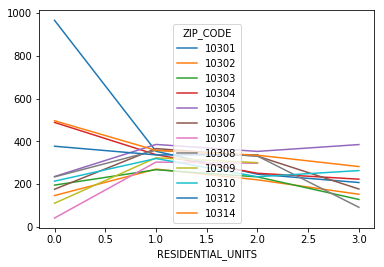

In [124]:
REPivot.transpose().plot()